# TERS of tetracyanoethylene across the full frequency range

Here, we caclulate the harmonic TERS Raman 1D line spectrum of the TCNE molecule in the isolated adsorbed geometry (using the surface-bound hessian to create displacements) over the whole frequency range.

In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import finite_field_ters as ffters

In [2]:
plt.style.use('seaborn-v0_8-darkgrid')

## Employ the new analysis functions from `ffters`

### Get the data

There a simple-to-use function called `analyze_1d_ters()` in the `finite_field_ters` package that reads the $z$-dipoles from the FHI-aims output and processes them into TERS intensities.

`fn_wavenumbers` is a pickled array of wavenumbers corresponding to the mode frequencies and can be requested by the run-ters.py script and is searched for under `working_dir`.

`periodic` can be `False` for a gas-phase system if that's how the calculation was performed. Here we used a giant 100x100x100 Å$^3$ periodic box for testing purposes, which is equivalent to open boundary conditions.

In [8]:
data_ters = ffters.analyze_1d_ters(working_dir=Path('./data'), fn_wavenumbers=Path('wavenumbers.pickle'), efield=1.0e-3, dq=5.0e-3, periodic=True)

The data is a dictionary that includes everything we need to analyze the TERS spectrum:

In [9]:
data_ters

{'wavenumbers': array([  45.72257185,   57.46787595,   63.55025458,  125.94109916,
         128.49914653,  133.92324196,  135.98682289,  140.68348693,
         143.44651316,  167.57932122,  168.59543665,  212.54064412,
         250.2729983 ,  418.88908558,  456.76633386,  477.15266174,
         489.83183328,  497.91365796,  513.28543169,  532.44339078,
         612.60003183,  630.33318079,  991.82953119, 1209.50838612,
        1242.42567855, 1296.35621363, 2042.63974541, 2054.16838624,
        2111.90214702, 2127.46253222]),
 'intensity': array([4.71975925e-05, 1.29065729e-08, 1.24218592e-05, 6.87733683e-06,
        7.47038169e-07, 1.37984571e-04, 2.02322604e-02, 1.36580891e-02,
        4.42546120e-05, 1.50558986e-02, 1.48580522e-05, 1.61718106e-04,
        2.89913345e-09, 1.81374092e-08, 2.29970543e-05, 2.57952709e-05,
        8.63508506e-03, 1.20674448e-05, 6.74928720e-04, 1.62266327e-08,
        1.38049857e-06, 4.47488529e-03, 9.00952453e-06, 8.03646629e-07,
        3.37957615e-03, 

### Plot the raw stick (harmonic) spectrum

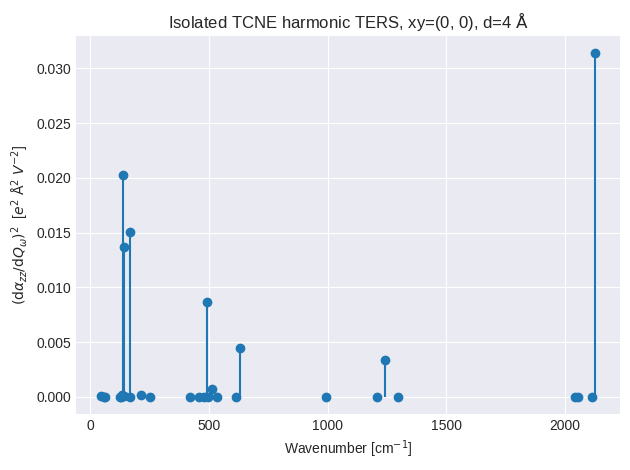

In [10]:
plt.plot(data_ters['wavenumbers'], data_ters['intensity'], 'o')
for i in range(len(data_ters['wavenumbers'])):
    plt.vlines(x=data_ters['wavenumbers'][i], ymin=0, ymax=data_ters['intensity'][i])
plt.xlabel(r'Wavenumber [cm$^{-1}$]')
plt.ylabel(r'$\left(\mathrm{d}\alpha_{zz} / \mathrm{d}Q_\omega\right)^2$  [$e^2$ $\mathrm{\AA}^2$ $V^{-2}$]')
plt.title(r'Isolated TCNE harmonic TERS, xy=(0, 0), d=4 $\mathrm{\AA}$')
plt.tight_layout()
plt.show();

### Broaden the spectrum with Gaussians

The harmonic spectrum can be broadened with Gaussians to mimic a thermal and possibly otherwise broadened spectral lines.

In [11]:
def gaussian(x, mu, sigma):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))

In [12]:
w = np.linspace(0, 2300, 1000)
signal = np.zeros(w.shape)
for wn, int in zip(data_ters['wavenumbers'], data_ters['intensity']):
    signal += int * gaussian(w, mu=wn, sigma=5)

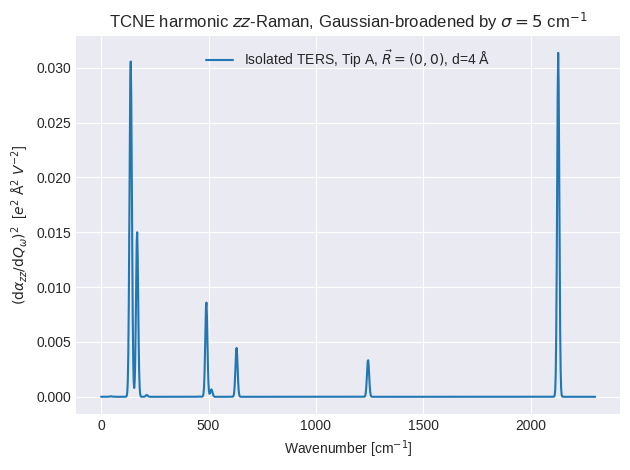

In [13]:
plt.plot(w, signal, label=r'Isolated TERS, Tip A, $\vec{R}=(0, 0)$, d=4 $\mathrm{\AA}$')
plt.xlabel(r'Wavenumber [cm$^{-1}$]')
plt.ylabel(r'$\left(\mathrm{d}\alpha_{zz} / \mathrm{d}Q_\omega\right)^2$  [$e^2$ $\mathrm{\AA}^2$ $V^{-2}$]')
plt.title(r'TCNE harmonic $zz$-Raman, Gaussian-broadened by $\sigma=5$ cm$^{-1}$')
plt.legend()
plt.tight_layout()
plt.show();